##Importing necessary libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

###Loading the dataset

In [8]:
df= pd.read_csv("ParisHousing.csv")

### Explore the structure of the dataset
###Display the first few rows of the dataset

In [9]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


#### Getting basic statistics of numerical features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

### Check for missing values

In [5]:
print(df.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


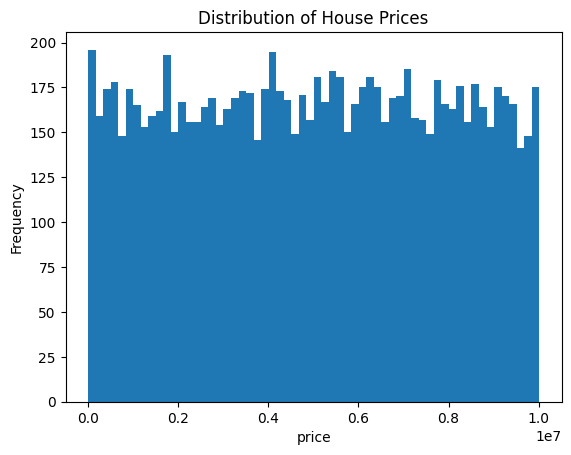

In [6]:
# Visualize the data (example: histogram of house prices)
plt.hist(df['price'], bins=60,)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

##Feature Importance

In [13]:
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model
model=RandomForestRegressor()
# Fit the model on the training data
X_train=df[['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom',
'hasGuestRoom']]
y_train=df['price']
model.fit(X_train,y_train)
# Get feature importances
feature_importances = model.feature_importances_
# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

squareMeters: 0.9999989625168163
numberOfRooms: 9.337884102431559e-08
hasYard: 3.0041068763764857e-08
hasPool: 3.170007632128396e-08
floors: 1.3723354078100567e-07
cityCode: 1.003015159664643e-07
cityPartRange: 6.382974386819483e-08
numPrevOwners: 7.011663298613177e-08
made: 8.764899476935682e-08
isNewBuilt: 2.1953840367088453e-08
hasStormProtector: 1.8623796637031552e-08
basement: 9.594034575608777e-08
attic: 1.0349077086100117e-07
garage: 9.238859001080925e-08
hasStorageRoom: 2.1286383434992032e-08
hasGuestRoom: 6.954904213997279e-08


##Correlation Analysis:

In [14]:
correlation_matrix=df.corr()
# Look at the correlations with the 'Price' column
feature_coorelation=correlation_matrix["price"].sort_values(ascending=False)
print (feature_coorelation)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='squareMeters'>

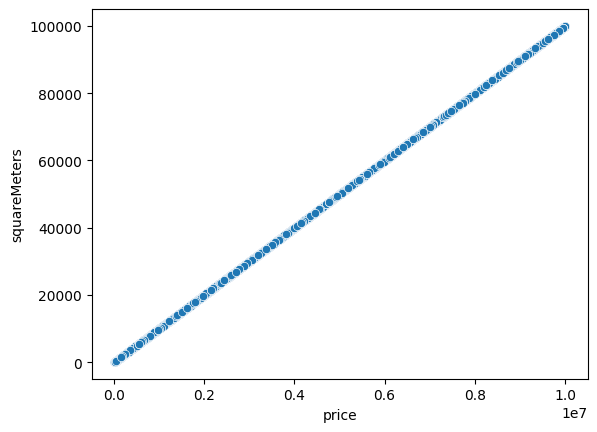

In [15]:
# we can see a strong correlation between the price and the squareMeters features
sns.scatterplot(df,x="price",y="squareMeters")

In [16]:
import datetime
current_year=datetime.datetime.now().year
df['ageOfProperty']=current_year - df['made']
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ageOfProperty
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,19
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,9
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,3
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,12
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,34


In [17]:
from sklearn.model_selection import train_test_split# we Define our features (X) and target variable (y)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# we Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we have to X_train, X_test, y_train, and y_test for training and evaluation.

##Model Training with Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

###Model Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1510.0341808542357
Mean Squared Error: 3695708.440619071
Root Mean Squared Error: 1922.4225447645663


In [21]:
# Define and assign values to the variables for the new house
new_square_meters = 75523
new_number_of_rooms = 4
new_has_yard = 1
new_has_pool = 0
new_floors = 2
new_city_code = 9373
new_city_part_range = 3
new_num_prev_owners = 1
new_construction_year = 2020
new_is_new_built = 1
new_has_storm_protector = 1
new_basement = 0
new_attic = 1
new_garage = 1
new_has_storage_room = 1
new_has_guest_room = 0
new_ageOfProperty=3

In [22]:
# Create a DataFrame for the new house features
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'made': [new_construction_year],
    'isNewBuilt': [new_is_new_built],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
    'ageOfProperty':[new_ageOfProperty]

})

In [23]:
# Now we can proceed with making predictions using the trained model
predicted_price =model.predict(new_house_features)
print(f"the Predicted Price:€{predicted_price[0]:.2f}")

the Predicted Price:€7556116.27


##Model Training with XGBoost regressor

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor model
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 206275982.1289253


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 11687.395852539068
Root Mean Squared Error (RMSE): 14362.311169478446


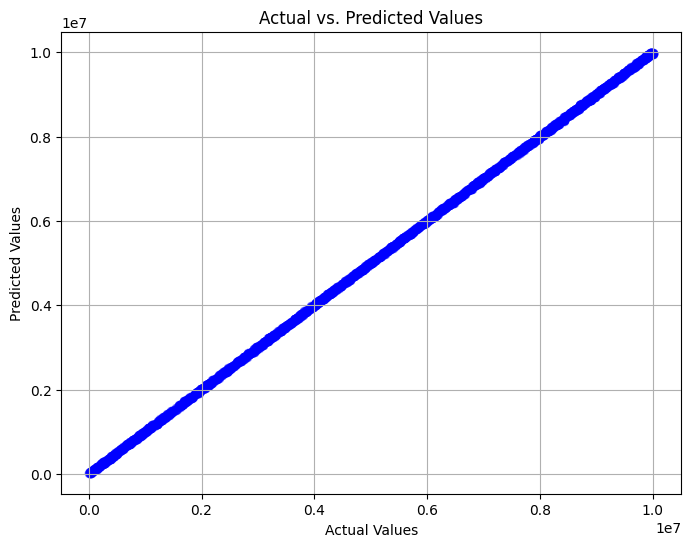

In [29]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Plotting actual vs. predicted
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


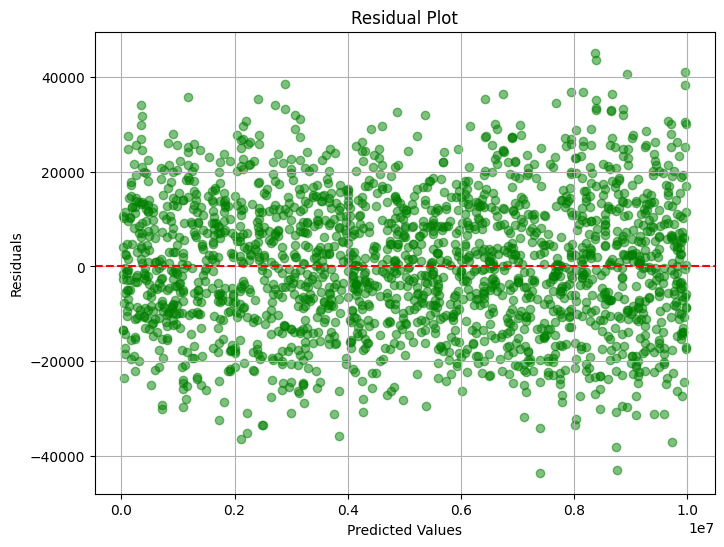

In [30]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)  # Plotting predicted values vs. residuals
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Adding horizontal line at y=0 for reference
plt.grid(True)
plt.show()
